In [1]:
import sys
import os
import re
import string
import sklearn
import numpy as np
import pandas as pd
import datetime
from pandas import DataFrame
from datetime import datetime
from datetime import timedelta
import csv
import pdb


#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import make_scorer, accuracy_score
#try:
#    from sklearn.model_selection import train_test_split
#except:
#    from sklearn.cross_validation import train_test_split
#from sklearn.metrics import classification_report
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.utils import shuffle

#import html
#import collections
#from collections import Counter
import operator

import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
path = 'C:\\Users\\Owner\\git\\IQFeed'
os.chdir(path)

In [3]:
df_entire = pd.read_csv('@ES#-60-20100104 000000-20131231_real.csv')
df_entire.head()

,2010-01-04 9:31,1120.5,1119.25,1119.5,1120,203257,14209
0,2010-01-04 9:32,1120.75,1119.75,1119.75,1120.25,212433,9176
1,2010-01-04 9:33,1120.25,1119.75,1120.25,1120.25,215851,3418
2,2010-01-04 9:34,1120.25,1119.75,1120.25,1120.00,220853,5002
3,2010-01-04 9:35,1120.00,1119.75,1119.75,1120.00,223226,2373
4,2010-01-04 9:36,1121.75,1119.75,1119.75,1121.75,236382,13156


In [ ]:
df_entire.iloc[0][0]

In [ ]:
len(df_entire)

In [5]:
with open('@ES#-60-20100104 000000-20131231_real.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    #dt = []
    #close = []
    #pdb.set_trace()
    last_day = datetime.strptime('1970-01-03 1:30:00', '%Y-%m-%d %H:%M:%S').date()
    close_prev = float(0.0)
    epsilon = float(1.0)
    counter = float(0.0)
    close_tmp = float(0.0)
    weekdays_df = {'weekday': ['Monday','Tuesday','Wednesday','Thursday','Friday'], 'freq': [0,0,0,0,0]}
    df = pd.DataFrame(data=weekdays_df)
    
    for row in readCSV:
        dates=datetime.strptime(row[0],'%Y-%m-%d %H:%M').date()
        curr_weekday = last_day.weekday()
        if last_day == dates:
            close_tmp = float(row[4]) #10 for Jan 2, 2014 last entry 
            # above: finding a way to capture last day's closing price if it's last row of 
            # current day for both cases of this if statement
            if abs((float(row[4]) - close_prev))  < epsilon:
                df['freq'].iloc[curr_weekday] += 1

            # above: finding a way to capture last day's closing price if it's last row of 
            # current day for both cases of this if statement            
        
        elif last_day < dates and not last_day == datetime.strptime('1970-01-03 1:30:00', '%Y-%m-%d %H:%M:%S').date():
            last_day = dates
            # day has just changed; fixate the close price from previous entry (last entry of prev. day)
            close_prev = close_tmp
            # this statement is executed only once in case if day has just changed, so we need to exctact current weekday here
            curr_weekday = last_day.weekday()
            # comparison executed once during  daytime - not to loose the first fow of the new day
            if (abs((float(row[4]) - close_prev))  < epsilon):
                df['freq'].iloc[curr_weekday] += 1
        elif last_day == datetime.strptime('1970-01-03 1:30:00', '%Y-%m-%d %H:%M:%S').date():
            last_day = dates
            curr_weekday = last_day.weekday()
            close_prev = float(row[4])
    
# now, remember our lists?

#    whatColor = input('What color do you wish to know the date of?:')
#   coldex = colors.index(whatColor)
#   theDate = dates[coldex]
#   print('The date of',whatColor,'is:',theDate)

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df

,freq,weekday
0,7547,Monday
1,6028,Tuesday
2,6852,Wednesday
3,6312,Thursday
4,7727,Friday


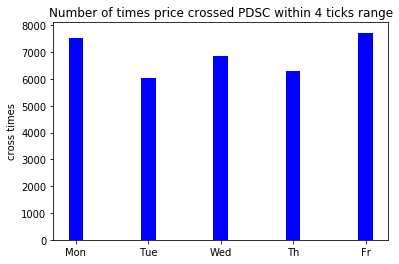

In [8]:
alphab = ['Mon','Tue','Wed','Th','Fr']
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

#ax = plt.axes()
#ax.set_xticks(pos)
#ax.set_xticklabels(alphab)

fig, ax = plt.subplots()
ax.set_ylabel('cross times')
ax.set_title('Number of times price crossed PDSC within 4 ticks range')
ax.set_xticks(pos)
ax.set_xticklabels(alphab)

fig = plt.bar(pos, df['freq'], width=0.2, color='b')
plt.show()


In [ ]:
#print(len(close))

In [ ]:
def retrace_per_day(day, col='close', epsilon=0.5):
    """take day data and returns whether there was a retrace.
    If yes, return 1 and the minute in which it did.
    Otherwise return 0 and np.nan"""
    cond = (np.abs(day[col] - day[col][0]) < epsilon)
    cond_index = cond[cond].index
    if len(cond_index) > 1:
        retrace, period = 1, cond_index[1]
    else:
        retrace, period = 0, np.nan
    return pd.Series({'retrace': retrace, 'period' : period})

In [ ]:
#temporary df for closing dates - might be obsolete soon
index = pd.date_range(0, periods=len(df['datetime'])/390, freq='D')
columns = ['date','day_close']
df_close = pd.DataFrame(index=index, columns=columns)
df_close = df_close.fillna(0) # with 0s rather than NaNs


In [ ]:
df_close.head()

In [ ]:
df['datetime'].iloc[388]

In [ ]:
t = pd.DataFrame({'date': [pd.to_datetime('2012-12-31 15:59:00'), pd.to_datetime('2013-12-31 15:59:00')], 'sample_data': [1, 2]})
t['date'][0]

In [ ]:
length = len(df['datetime'])
i = 389
x = []

while i <= length:
    x.append(df['datetime'].iloc[::i])
    i +=390
    #df_close.iloc[i][1] = df['close'].iloc[388]

In [ ]:
x

In [ ]:
df['datetime'].iloc[388]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
for idx, day in df.groupby(pd.Grouper(key='datetime', freq="1D")):
    print(day['datetime']) 
    print(day['close']) 
    
    

In [ ]:
length = len(df['datetime'])/390
length

In [ ]:
#day.iloc[388][4]

In [ ]:
len(day)

In [ ]:
len(day)

In [ ]:
#df.groupby(pd.TimeGrouper('1D')).apply(retrace_per_day)
df['datetime'] = pd.to_datetime(df['datetime'])
df.groupby(pd.Grouper(key='datetime', freq="1D")).mean().plot()

In [ ]:
type(day)